In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook

In [2]:
Income_Brackets = ['< 10,000', '10,000 - 14,999', '15,000 - 24,999', '25,000 - 34,999', '35,000 - 49,999', '50,000 - 74,999',
                   '75,000 - 99,999', '100,000 - 149,999', '150,000 - 199,999', '> 200,000', 'Median Income'] 

In [3]:
Miamidf = pd.read_csv('Miami_ACS_17_5YR_DP03_with_ann.csv', header =1, index_col =2)
Miamidf = Miamidf.transpose()
Miami = Miamidf.iloc[208:246:4]
Miami = Miami.append(Miamidf.iloc[246])
Miami['Income'] = Income_Brackets
Miami.set_index('Income', inplace=True)

In [4]:
Cookdf = pd.read_csv('Cook_ACS_17_5YR_DP03_with_ann.csv', header = 1, index_col = 2)
Cookdf = Cookdf.transpose()
Cook = Cookdf.iloc[208:246:4]
Cook = Cook.append(Cookdf.iloc[246])
Cook['Income'] = Income_Brackets
Cook.set_index('Income', inplace=True)

In [5]:
df = pd.merge(Miami, Cook, left_index=True, right_index=True)

In [6]:
Miami = df['Miami-Dade County, Florida'].iloc[0:10]
Cook = df['Cook County, Illinois'].iloc[0:10]
x = np.arange((len(df.index))-1)
Miami_Median_Income = df['Miami-Dade County, Florida'].iloc[10]
Cook_Median_Income = df['Cook County, Illinois'].iloc[10]
x1=np.arange(2)

Text(0, 0.25, 'Median Income')

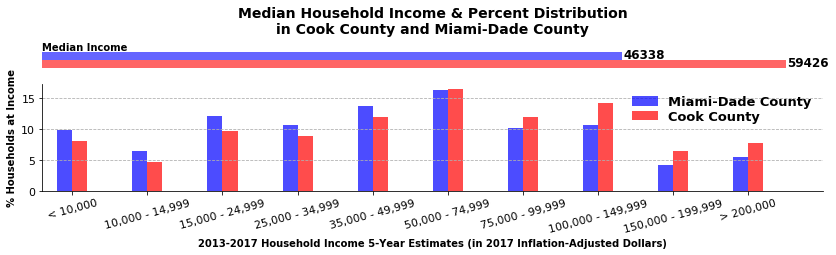

In [7]:
plt.figure(figsize=(14,4))
gspec = gridspec.GridSpec(10, 2)
ax1 = plt.subplot(gspec[1:3,:], frameon=False)
ax2 = plt.subplot(gspec[3:8,:])
ax2.bar(x - 0.1, Miami, width = 0.2, color = 'blue', align = 'center', label = 'Miami-Dade County', alpha=0.7)
ax2.bar(x + 0.1, Cook, width = 0.2, color = 'red', align = 'center', label= 'Cook County', alpha=0.7)
ax1.barh(0 + 0.1, Miami_Median_Income, height = 0.2, color = 'blue', align = 'center', alpha=0.6)
ax1.barh(0-0.1, Cook_Median_Income, height = 0.2, color = 'red', align = 'center', alpha=0.6)
ax1.set_ylim([-.5,.5])
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax2.set_xticklabels(df.index[0:10])
ax2.set_xticks(np.arange((len(df.index))-1.2))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='x', labelrotation = 15)
ax2.tick_params(axis='both',  labelsize = 11)
ax1.tick_params(axis='y', labelrotation = 75)
legend_properties = {'weight':'bold', 'size':13}
ax2.legend(frameon=False, prop = legend_properties, borderpad = None, labelspacing = .1, borderaxespad=None, loc=1)
ax2.set_xbound(-0.4, 10)
ax2.grid(axis='y', linestyle = '--')
ax1.set_title('Median Household Income & Percent Distribution\nin Cook County and Miami-Dade County', loc='center', fontsize=14, fontweight='bold')
mpl.rcParams['axes.titlepad'] = 10
ax2.set_ylabel('% Households at Income', fontweight='bold')
ax2.set_xlabel('2013-2017 Household Income 5-Year Estimates (in 2017 Inflation-Adjusted Dollars)', fontweight='bold')
ax1.text(Miami_Median_Income+100, 0.05, str(Miami_Median_Income), color='black', fontweight='bold', fontsize=12)
ax1.text(Cook_Median_Income+100,-0.15, str(Cook_Median_Income), color='black', fontweight='bold', fontsize=12)
ax1.text(0,0.25, 'Median Income', color='black', fontweight='bold', fontsize=10)